# Złączenie plików

In [10]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

train = torch.load("train_dataset_big.pt")
test = torch.load("test_dataset_big.pt")

dataset = torch.utils.data.ConcatDataset([train, test])

# Wyświetl informacje o zbiorze
print("Liczba grafów w zbiorze:", len(dataset))

# Przeiteruj przez pierwszy graf w zbiorze i wyświetl jego właściwości
print("Informacje o pierwszym grafie:")
first = dataset[0]
print(f"Cechy globalne: density = {first.global_feature[0][0]}; average_clustering = {first.global_feature[0][1]}")


Liczba grafów w zbiorze: 2300
Informacje o pierwszym grafie:
Cechy globalne: density = 0.460317462682724; average_clustering = 0.4645223021507263


# Korelacja między cechami a etykietą

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

densities = []
average_clustering = []
labels = []
df = pd.DataFrame()

for graph in dataset:
    labels.append(graph.y[0].item())
    densities.append(graph.global_feature[0][0].item())
    average_clustering.append(graph.global_feature[0][1].item())

df['labels'] = pd.DataFrame(labels)
df['densities'] = pd.DataFrame(densities)
df['average_clustering'] = pd.DataFrame(average_clustering)
print(df)

df.corr()

          labels  densities  average_clustering
0     776.679993   0.460317            0.464522
1     541.690002   0.337302            0.339359
2     193.619995   0.124339            0.150419
3     798.280029   0.473545            0.470910
4     459.049988   0.288360            0.276505
...          ...        ...                 ...
2295  284.540009   0.181217            0.170825
2296  280.470001   0.175926            0.182000
2297  650.200012   0.395503            0.402219
2298  860.440002   0.522487            0.522603
2299  574.260010   0.351852            0.349937

[2300 rows x 3 columns]


,labels,densities,average_clustering
labels,1.000000,0.997303,0.995173
densities,0.997303,1.000000,0.998032
average_clustering,0.995173,0.998032,1.000000


<Axes: xlabel='average_clustering', ylabel='labels'>

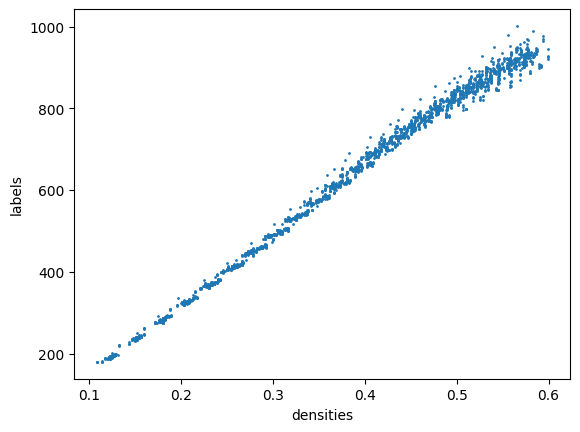

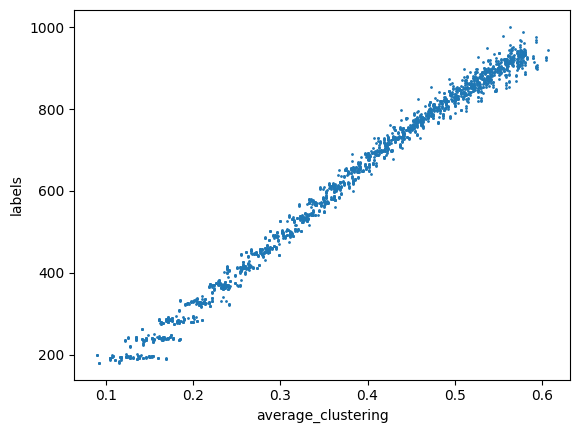

In [23]:
df.plot.scatter(x='densities', y='labels', s=1.0)
df.plot.scatter(x='average_clustering', y='labels', s=1.0)